In [52]:
import imageio
import glob
import numpy as np

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data = "/content/drive/My Drive/medical_project/Epileptic_Seizure_Recognition.csv"
import pandas as pd
df = pd.read_csv(data, header=0, index_col=0)

In [55]:
df.head()
#print(df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [57]:
df["seizure"] = df.y == 1
df["seizure"] = df["seizure"].astype(int)
target = df["seizure"].values
df1 = df.drop(["seizure", "y"], axis=1)

In [58]:
unique, counts = np.unique(target, return_counts=True)
dict(zip(unique,counts))

{0: 9200, 1: 2300}

In [59]:
import matplotlib.pyplot as plt

index = 0
for index in range(500):
  image =  df.iloc[index,0:178]
  plt.plot(range(178), image)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title('Epileptic')
  savedir = f"/content/drive/My Drive/medical_project/epileptic{index}.png"
  plt.savefig(savedir)
  plt.close()




In [60]:
#Load the saved images

imstack = []
index = 0
for im_path in glob.glob("/content/drive/My Drive/medical_project/*.png"):
  if index == 0:
    imstack = imageio.imread(im_path)
    index += 1
  elif index == 1:
     im = (imageio.imread(im_path))
     imstack = np.stack([imstack, im], axis=0)
     index += 1
  else:
     im = (imageio.imread(im_path))
     im = np.expand_dims(im,axis=0)
     imstack = np.concatenate([imstack, im], axis=0)

In [61]:
print(target.shape)

(11500,)


In [62]:
# Libraries needed for a conv2D network
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential

In [63]:
# Build the conv2D network
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (288 ,432, 4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 286, 430, 32)      1184      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 143, 215, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 141, 213, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 70, 106, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 68, 104, 128)      73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 34, 52, 128)     

In [64]:
print(target.shape)

(11500,)


In [65]:
# Create a test and training set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imstack, target[:500], test_size=0.2, random_state=42)

In [66]:
# Compiling the CNN

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [67]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [68]:
#Fitting the CNN
history = model.fit(x_train, y_train, epochs = 20, batch_size=16, validation_data=(x_test, y_test), verbose=2)


Epoch 1/20
25/25 - 119s - loss: 1639.8365 - acc: 0.6575 - val_loss: 2.2012 - val_acc: 0.1800 - 119s/epoch - 5s/step
Epoch 2/20
25/25 - 114s - loss: 0.7044 - acc: 0.7100 - val_loss: 0.4728 - val_acc: 0.8200 - 114s/epoch - 5s/step
Epoch 3/20
25/25 - 113s - loss: 0.5223 - acc: 0.7875 - val_loss: 0.4705 - val_acc: 0.8200 - 113s/epoch - 5s/step
Epoch 4/20
25/25 - 113s - loss: 0.5182 - acc: 0.7875 - val_loss: 0.4731 - val_acc: 0.8200 - 113s/epoch - 5s/step
Epoch 5/20
25/25 - 114s - loss: 0.4958 - acc: 0.7950 - val_loss: 0.4781 - val_acc: 0.8100 - 114s/epoch - 5s/step
Epoch 6/20
25/25 - 117s - loss: 0.4393 - acc: 0.8150 - val_loss: 0.4854 - val_acc: 0.8200 - 117s/epoch - 5s/step
Epoch 7/20
25/25 - 115s - loss: 0.4567 - acc: 0.8000 - val_loss: 0.4399 - val_acc: 0.8200 - 115s/epoch - 5s/step
Epoch 8/20
25/25 - 113s - loss: 0.3591 - acc: 0.8325 - val_loss: 0.4479 - val_acc: 0.8300 - 113s/epoch - 5s/step
Epoch 9/20
25/25 - 113s - loss: 0.3383 - acc: 0.8600 - val_loss: 0.4506 - val_acc: 0.8500 - 1

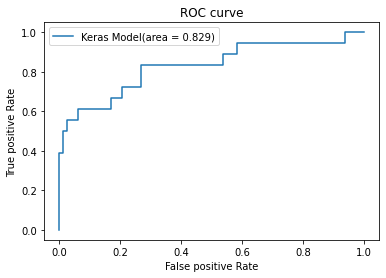

In [69]:
#Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
AUC = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras Model(area = {:.3f})'.format(AUC))
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()